In [2]:
#Import the libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
def make_row(row, row2):
    new_row = {}
    for i in ['TotalConn', 'NetC_meas', 'NetC_rank', 'NetC_sd', 'bband', 'bband_rank', 'bband_sd', 'bband_meas', 'Dialup']:
        new_row[i] = row[i]
    for i in ['health_rate', 'health_count', 'area_code']:
        if row2[i][list(row2.index)[0]] != 'area_code':
            new_row[i] = float(row2[i][list(row2.index)[0]])
        else:
            new_row[i] = row2[i][list(row2.index)[0]]
    return new_row

In [3]:
#Read in CSV Files
internet_df = pd.read_csv("internet.csv")
health_df = pd.read_csv("health.csv")


In [4]:
compare_df = pd.DataFrame()

In [5]:
#Make a new dataframe containing area codes that are in both datasets that are not null
for key,row in internet_df.iterrows():
        index = health_df.ix[health_df['area_code'] == row['LGA2011']]
        #print(index['area_code'])
        if (index['health_rate'][list(index.index)[0]] != 'null'):
            d = make_row(row, index)
            compare_df = compare_df.append(d, ignore_index=True)

        

Pearson Correlation:  0.458157765674


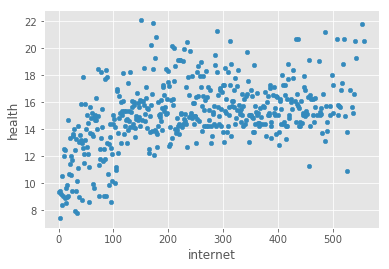

In [6]:
d = pd.DataFrame({'internet':compare_df['NetC_rank'], 'health':compare_df['health_rate']}, columns=['internet', 'health'])
print("Pearson Correlation: ", d['internet'].corr(d['health']))
d.plot(kind='scatter', x='internet', y='health')
plt.show()